# PROBLEM 5.1

__A data mining routine has been applied to a transaction dataset and has classified 88 records as fraudulent (30 correctly so) and 952 as non-fraudulent (920 correctly so). Construct the confusion matrix and calculate the overall error rate__

In [1]:
import pandas as pd

In [2]:
data = [[30,32], 
    [58, 920]]

In [3]:
df=pd.DataFrame(data, columns=['Fraudulent_pred', 'Non_Fraudulent_pred'], index=['Fraudulent_Actual','Non_Fraudulent_Actual'])
df

,Fraudulent_pred,Non_Fraudulent_pred
Fraudulent_Actual,30,32
Non_Fraudulent_Actual,58,920


In [4]:
overall_error_rate= (df.loc['Fraudulent_Actual','Non_Fraudulent_pred']+df.loc['Non_Fraudulent_Actual','Fraudulent_pred'])/(
df.loc['Fraudulent_Actual','Non_Fraudulent_pred']+
df.loc['Non_Fraudulent_Actual','Fraudulent_pred']+
df.loc['Fraudulent_Actual','Fraudulent_pred']+
df.loc['Non_Fraudulent_Actual','Non_Fraudulent_pred']

)
overall_error_rate

0.08653846153846154

# PROBLEM 5.4

__Consider Figure 5.12, the decile lift chart for the transaction data
model, applied to new data.__

__a. Interpret the meaning of the first and second bars from the
left__

First bar shows that if we select 10% of records that are ranked by our model with highest propensities, yields 6 times as many 1's than the random selection of 10% records.
Similarly, second bar shows that if we select 20% of records that are ranked by our model with highest propensities, yields twice times as many 1's than the random selection of 20% records.


__b. Explain how you might use this information in practice.__


Assuming there is a population, and we need to identify potential targeted group (responders). Let's say we launch a marketing campaign and want to give discounts vouchers to 20% of population, so we would like this 20% group to have more responders than selection 20% at random. 
The lift chart as above indicates that we are twice as likely to get responders, than selecting at random, if we select top 20% of high propensity records, thus adding cost benefits for the organization. 


__c. Another analyst comments that you could improve the
accuracy of the model by classifying everything as
nonfraudulent. If you do that, what is the error rate?__

error_rate= (FP+ FN)/all

In [5]:
30/1040


0.028846153846153848

In [6]:
error_rate = 62/(920+58+62)
error_rate

0.05961538461538462

__d. Comment on the usefulness, in this situation, of these two
metrics of model performance (error rate and lift)__

Classifying everyone as non-fraudulent as above gives roughly 6% error rate, which is less than the error rate we got in problem 5.1 where 30 fraudulent are classified correctly with error rate of (8.6%). In situations like this, where it's more important to identify the class correctly, we can tolerate error rate while lift is more useful in such scenario. If we expect the % of fraudulent is 2% in the population, then we would want to pick top 2% of those records which have high propensity of being fraudulent, to avoid the cost and other problems added due to misclassification.   

# PROBLEM 5.7

__Table 5.7 shows a small set of predictive model validation results
for a classification model, with both actual values and
propensities.__ 

__a.Calculate error rates, sensitivity, and specificity using
cutoffs of 0.25, 0.5, and 0.75.__


__b. Create a decile lift chart__

In [7]:
from dmba import classificationSummary
from dmba import liftChart, gainsChart
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [8]:
data=[[0.03,0.52,0.38,0.82,0.33,0.42,0.55,0.59,0.09,0.21, 0.43,0.04,0.08, 0.13,0.01,0.79,0.42,0.29,0.08,0.02],
 [0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0]]

In [9]:
df=pd.DataFrame(data={'Propensity':[0.03,0.52,0.38,0.82,0.33,0.42,0.55,0.59,0.09,0.21, 0.43,0.04,0.08, 0.13,0.01,0.79,0.42,0.29,0.08,0.02],
                  'Actual':[0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0]})

### Cutoff = 0.25

In [10]:
cutoff= 0.25
predicted= [1 if p > cutoff else  0 for p in df.Propensity]
classificationSummary(df.Actual, predicted, class_names=['non-member', 'member'])

cm = confusion_matrix(df[['Actual']],predicted)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
error_rate1=(cm[0,1]+cm[1,0])/total
print ('Error rate : ', error_rate1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Confusion Matrix (Accuracy 0.6000)

           Prediction
    Actual non-member     member
non-member          9          8
    member          0          3
Error rate :  0.4
Sensitivity :  0.5294117647058824
Specificity :  1.0


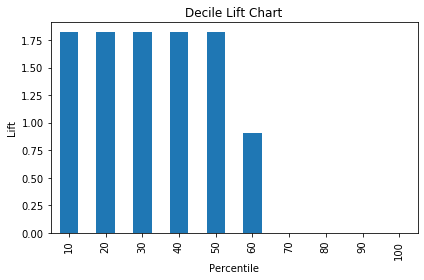

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1)

ax = liftChart(pd.Series(predicted).sort_values(ascending=False), ax=axes, labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

### Cutoff= 0.5

In [12]:
cutoff= 0.5
predicted= [1 if p > cutoff else  0 for p in df.Propensity]
classificationSummary(df.Actual, predicted, class_names=['non-member', 'member'])

cm = confusion_matrix(df[['Actual']],predicted)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
error_rate2=(cm[0,1]+cm[1,0])/total
print ('Error rate : ', error_rate2)

sensitivity2 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity2)

Confusion Matrix (Accuracy 0.9000)

           Prediction
    Actual non-member     member
non-member         15          2
    member          0          3
Error rate :  0.1
Sensitivity :  0.8823529411764706
Specificity :  1.0


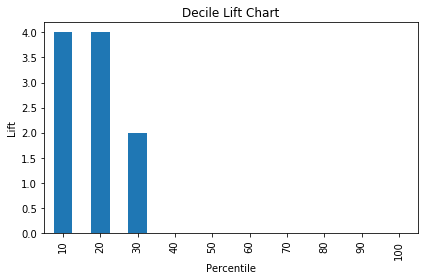

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1)

ax = liftChart(pd.Series(predicted).sort_values(ascending=False), ax=axes, labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

### Cutoff = 0.75

In [14]:
cutoff= 0.75
predicted= [1 if p > cutoff else  0 for p in df.Propensity]
classificationSummary(df.Actual, predicted, class_names=['non-member', 'member'])

cm = confusion_matrix(df[['Actual']],predicted)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
error_rate3=(cm[0,1]+cm[1,0])/total
print ('Error rate : ', error_rate3)

sensitivity3 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity3)

Confusion Matrix (Accuracy 0.9500)

           Prediction
    Actual non-member     member
non-member         17          0
    member          1          2
Error rate :  0.05
Sensitivity :  1.0
Specificity :  0.6666666666666666


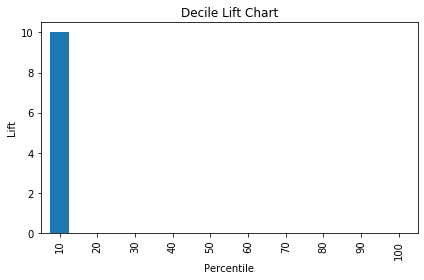

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1)

ax = liftChart(pd.Series(predicted).sort_values(ascending=False), ax=axes, labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

# PROBLEM 9.1 Competitive Auctions on eBay.com.

__Data Preprocessing. Convert variable Duration into a categorical variable. Split the data into
training (60%) and validation (40%) datasets.__

__a. Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of
records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in
terms of rules. (Note: If you had to slightly reduce the number of predictors due to software
limitations, or for clarity of presentation, which would be a good variable to choose?)__

In [16]:
%matplotlib inline
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary, gainsChart, liftChart

In [17]:
df = pd.read_csv('eBayAuctions.csv')
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [19]:
df.rename({'Competitive?':'Competitive'}, axis=1 , inplace=True)

In [20]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sellerRating                   1972 non-null   int64  
 1   Duration                       1972 non-null   int64  
 2   ClosePrice                     1972 non-null   float64
 3   OpenPrice                      1972 non-null   float64
 4   Competitive                    1972 non-null   int64  
 5   Category_Automotive            1972 non-null   uint8  
 6   Category_Books                 1972 non-null   uint8  
 7   Category_Business/Industrial   1972 non-null   uint8  
 8   Category_Clothing/Accessories  1972 non-null   uint8  
 9   Category_Coins/Stamps          1972 non-null   uint8  
 10  Category_Collectibles          1972 non-null   uint8  
 11  Category_Computer              1972 non-null   uint8  
 12  Category_Electronics           1972 non-null   u

In [21]:
df['Duration'] = df['Duration'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   sellerRating                   1972 non-null   int64   
 1   Duration                       1972 non-null   category
 2   ClosePrice                     1972 non-null   float64 
 3   OpenPrice                      1972 non-null   float64 
 4   Competitive                    1972 non-null   int64   
 5   Category_Automotive            1972 non-null   uint8   
 6   Category_Books                 1972 non-null   uint8   
 7   Category_Business/Industrial   1972 non-null   uint8   
 8   Category_Clothing/Accessories  1972 non-null   uint8   
 9   Category_Coins/Stamps          1972 non-null   uint8   
 10  Category_Collectibles          1972 non-null   uint8   
 11  Category_Computer              1972 non-null   uint8   
 12  Category_Electronics           197

In [22]:
df_x = df.drop(columns='Competitive')
df_y = df['Competitive']

In [23]:
train_X, valid_X, train_y, valid_y = train_test_split(df_x, df_y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape)
print('Training Target: ', train_y.shape)
print('Validation set: ', valid_X.shape)
print('Validation Target: ', valid_y.shape)

Training set: (1183, 29)
Training Target:  (1183,)
Validation set:  (789, 29)
Validation Target:  (789,)


In [24]:
model = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_impurity_decrease=0.01)
model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

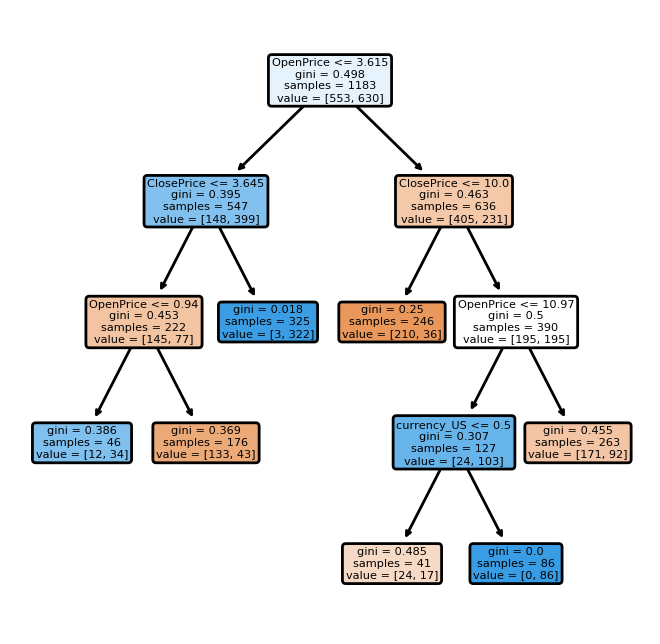

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(model, feature_names = df_x.columns, filled = True,rounded=True)
plt.show()

__9.1.d. Fit another classification tree (using a tree with a minimum number of records per terminal node = 50 and maximum depth = 7), this time only with predictors that can be used for predicting the outcome of a new auction. Describe the resulting tree in terms of rules. Make sure to report the smallest set of rules required for classification.__

In [26]:
df.astype('object').describe(include='all').loc['unique', :]

sellerRating                     461.0
Duration                           5.0
ClosePrice                       827.0
OpenPrice                        291.0
Competitive                        2.0
Category_Automotive                2.0
Category_Books                     2.0
Category_Business/Industrial       2.0
Category_Clothing/Accessories      2.0
Category_Coins/Stamps              2.0
Category_Collectibles              2.0
Category_Computer                  2.0
Category_Electronics               2.0
Category_EverythingElse            2.0
Category_Health/Beauty             2.0
Category_Home/Garden               2.0
Category_Jewelry                   2.0
Category_Music/Movie/Game          2.0
Category_Photography               2.0
Category_Pottery/Glass             2.0
Category_SportingGoods             2.0
Category_Toys/Hobbies              2.0
currency_GBP                       2.0
currency_US                        2.0
endDay_Mon                         2.0
endDay_Sat               

In [27]:
# TO use predictors which can be used to predict the outcome of "new" auction


New auction cannot have _closing price_ if the auction is going on, so removing it will give better image of real environment 

In [28]:
columns_to_remove=['ClosePrice']

In [29]:
df.drop(columns_to_remove, axis=1 , inplace= True)

In [30]:
df_x = df.drop(columns='Competitive')
df_y = df['Competitive']
train_X, valid_X, train_y, valid_y = train_test_split(df_x, df_y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape)
print('Training Target: ', train_y.shape)
print('Validation set: ', valid_X.shape)
print('Validation Target: ', valid_y.shape)

Training set: (1183, 28)
Training Target:  (1183,)
Validation set:  (789, 28)
Validation Target:  (789,)


In [31]:
model = DecisionTreeClassifier(max_depth=7, min_samples_split=50,min_impurity_decrease=0.01,random_state=1)
model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

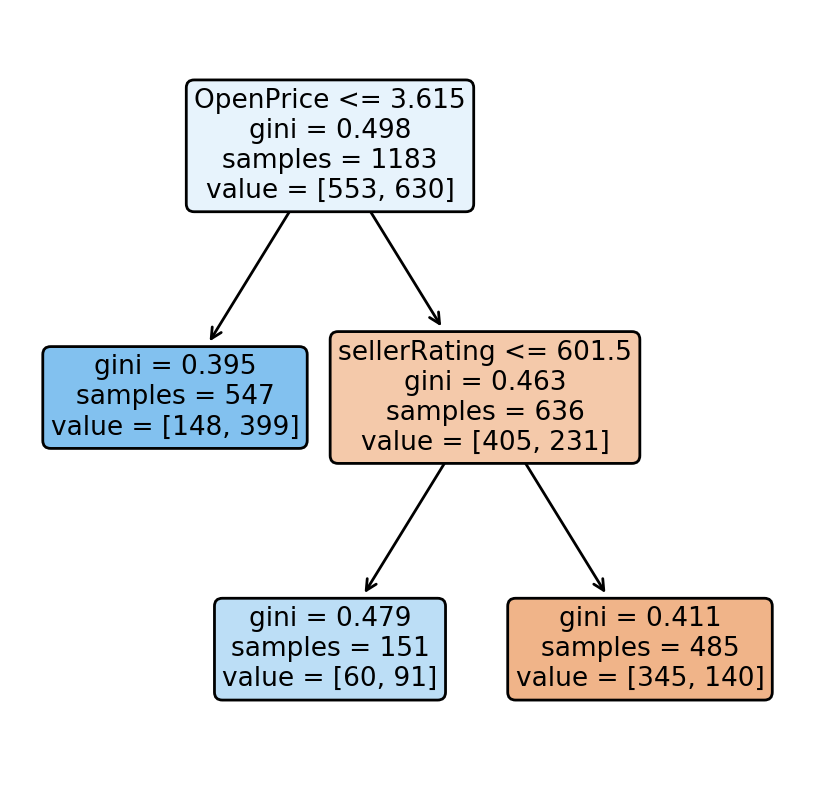

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)

tree.plot_tree(model, feature_names = df_x.columns, filled = True,rounded=True)
plt.show()

#### Rules:

1- If (OpenPrice <= 3.615) then class = 1

2- If (OpenPrice > 3.615) and (sellerRating <= 601.5) then class = 1

3- If (OpenPrice > 3.615) and (sellerRating > 601.5) then class = 0


# Problem 9.3 Predicting Prices of Used Cars (Regression Trees).

__Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.__

__a. Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04,
KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax,
Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows,
Sport_Model, and Tow_Bar. Set random_state=1.__

In [33]:
df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [34]:

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
              'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 
              'Powered_Windows','Sport_Model', 'Tow_Bar']
target=['Price']
df = df[predictors+target]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age_08_04         1436 non-null   int64 
 1   KM                1436 non-null   int64 
 2   Fuel_Type         1436 non-null   object
 3   HP                1436 non-null   int64 
 4   Automatic         1436 non-null   int64 
 5   Doors             1436 non-null   int64 
 6   Quarterly_Tax     1436 non-null   int64 
 7   Mfr_Guarantee     1436 non-null   int64 
 8   Guarantee_Period  1436 non-null   int64 
 9   Airco             1436 non-null   int64 
 10  Automatic_airco   1436 non-null   int64 
 11  CD_Player         1436 non-null   int64 
 12  Powered_Windows   1436 non-null   int64 
 13  Sport_Model       1436 non-null   int64 
 14  Tow_Bar           1436 non-null   int64 
 15  Price             1436 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 179.6+ KB


In [36]:
df =pd.get_dummies(df,columns=['Fuel_Type'] ,drop_first=True)

In [37]:
df_x = df.drop(columns='Price')
df_y = df['Price']
train_X, valid_X, train_y, valid_y = train_test_split(df_x, df_y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape)
print('Training Target: ', train_y.shape)
print('Validation set: ', valid_X.shape)
print('Validation Target: ', valid_y.shape)

Training set: (861, 16)
Training Target:  (861,)
Validation set:  (575, 16)
Validation Target:  (575,)


In [38]:
# setting random state will ensure that the same tree is produced every time
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [39]:
# Finding variable importance
importances= model.feature_importances_
importance = pd.DataFrame({'features': train_X.columns, 'importance': importances})
importance.sort_values(by='importance', ascending=False)

,features,importance
0,Age_08_04,0.844867
2,HP,0.053789
1,KM,0.049601
9,Automatic_airco,0.013358
5,Quarterly_Tax,0.006769
11,Powered_Windows,0.005221
4,Doors,0.004864
8,Airco,0.004727
12,Sport_Model,0.004459
6,Mfr_Guarantee,0.003714


Top 3 important variables are:

1- Age_08_04

2- Horse power (HP)

3- Kilometers (KM)  

__ii. Compare the prediction errors of the training and validation sets by examining their RMS
error and by plotting the two boxplots. How does the predictive performance of the
validation set compare to the training set? Why does this occur?__


In [40]:
print("Training Statistics:\n")
regressionSummary(train_y, model.predict(train_X))
print("\nValidation Statistics:\n")
regressionSummary(valid_y, model.predict(valid_X))


Training Statistics:


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000

Validation Statistics:


Regression statistics

                      Mean Error (ME) : 76.6557
       Root Mean Squared Error (RMSE) : 1492.3365
            Mean Absolute Error (MAE) : 1152.4852
          Mean Percentage Error (MPE) : -0.3363
Mean Absolute Percentage Error (MAPE) : 11.3783


In [41]:
train_error= model.predict(train_X)-train_y
valid_error = model.predict(valid_X)- valid_y

In [42]:
import seaborn as sns

In [43]:
valid_error

509       50.0
435       55.0
321     2200.0
1055    2000.0
288       55.0
         ...  
549    -2550.0
300     -455.0
459    -1140.0
797        0.0
596      500.0
Name: Price, Length: 575, dtype: float64

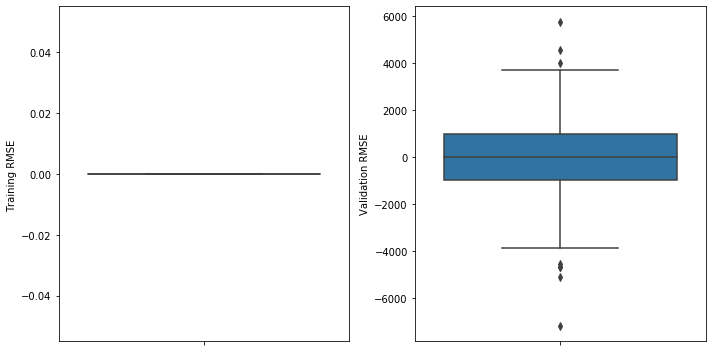

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize = (10,5))
ax = sns.boxplot(y=train_error , ax= axes[0])
ax.set_ylabel('Training RMSE ')
ax1 = sns.boxplot(y=valid_error , ax= axes[1])
ax1.set_ylabel('Validation RMSE')
plt.tight_layout()
plt.show()

There is much difference between the training set RMSE (zero) and validation set RMSE (1492). This is because the tree fitted on training set was full grown, so overfitting has occured. When we applied the same model to validation set (unseen data), the results aren't as accurate.  

__iii. How might we achieve better validation predictive performance at the expense of training
performance?__

We can fine tune training parameters by using Grid search, and prune the branches which may not be resulting in any information gain.

__iv. Create a smaller tree by using GridSearchCV() with cv = 5 to find a fine-tuned tree.
Compared to the full-grown tree, what is the predictive performance on the validation set?__


In [45]:
param_grid = {
 'max_depth': [5, 10, 15, 20, 25],
 'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
 'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)


Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [46]:
param_grid = {
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
 'min_samples_split': [14, 15, 16, 18, 20, ],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)


Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [47]:
regTree = gridSearch.best_estimator_
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=1500)
tree.plot_tree(regTree, feature_names = df_x.columns, filled = True,rounded=True)
plt.show()

In [48]:
# error report for training and validation sets
print('training set:')
regressionSummary(train_y, regTree.predict(train_X))
print('\nvalidation set:')
regressionSummary(valid_y, regTree.predict(valid_X))

training set:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1082.6992
            Mean Absolute Error (MAE) : 786.5953
          Mean Percentage Error (MPE) : -0.9986
Mean Absolute Percentage Error (MAPE) : 7.6224

validation set:

Regression statistics

                      Mean Error (ME) : 24.8976
       Root Mean Squared Error (RMSE) : 1251.3861
            Mean Absolute Error (MAE) : 958.1684
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.5594


Using exhaustive Grid search we found optimal estimator parameters. Training TMSE and Validation RMSE are very close as opposed to the full grown tree. However the training accuracy have been lost when the tree is not full grown. 